## Student #1 ID: 207781956

## Student #2 ID: 209193002

# Exercise 1: Decision Trees

In this assignment you will implement a Decision Tree algorithm as learned in class.

## Read the following instructions carefully:

1. This jupyter notebook contains all the step by step instructions needed for this exercise.
1. Write **efficient vectorized** code whenever possible. Some calculations in this exercise take several minutes when implemented efficiently, and might take much longer otherwise. Unnecessary loops will result in point deduction.
1. You are responsible for the correctness of your code and should add as many tests as you see fit. Those tests will not be graded nor checked.
1. You are free to add code and markdown cells as you see fit.
1. Write your functions in this jupyter notebook only. Do not create external python modules and import from them.
1. You are allowed to use functions and methods from the [Python Standard Library](https://docs.python.org/3/library/) and [numpy](https://www.numpy.org/devdocs/reference/) only, unless otherwise mentioned.
1. Your code must run without errors. It is a good idea to restart the notebook and run it from end to end before you submit your exercise.
1. Answers to qualitative questions should be written in **markdown cells (with $\LaTeX$ support)**.
1. Submit this jupyter notebook only using your ID as a filename. **No not use ZIP or RAR**. For example, your submission should look like this: `123456789.ipynb` if you worked by yourself or `123456789_987654321.ipynb` if you worked in pairs.

## In this exercise you will perform the following:
1. Practice OOP in python.
2. Implement two impurity measures: Gini and Entropy.
3. Construct a decision tree algorithm.
4. Prune the tree to achieve better results.
5. Visualize your results.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# make matplotlib figures appear inline in the notebook
%matplotlib inline
plt.rcParams['figure.figsize'] = (10.0, 8.0) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

# Make the notebook automatically reload external python modules
%load_ext autoreload
%autoreload 2

## Warmup - OOP in python

Our desicion tree will be implemented using a dedicated python class. Take a minute and practice your object oriented skills. Create a tree with some nodes and make sure you understand how objects in python work.

In [5]:
class Node(object):
    def __init__(self, data):
        self.data = data
        self.children = []

    def add_child(self, node):
        self.children.append(node)

In [ ]:
n = Node(5)
p = Node(6)
q = Node(7)
n.add_child(p)
n.add_child(q)
n.children

## Data preprocessing

We will use the breast cancer dataset that is available as a part of sklearn. In this example, our dataset will be a single matrix with the **labels on the last column**. Notice that you are not allowed to use additional functions from sklearn.

In [2]:
from sklearn import datasets
from sklearn.model_selection import train_test_split

# load dataset
X, y = datasets.load_breast_cancer(return_X_y = True)
X = np.column_stack([X,y]) # the last column holds the labels

# split dataset
X_train, X_test = train_test_split(X, random_state=99)

print("Training dataset shape: ", X_train.shape)
print("Testing dataset shape: ", X_test.shape)



Training dataset shape:  (426, 31)
Testing dataset shape:  (143, 31)


## Impurity Measures (10 points)

Impurity is a measure of how often a randomly chosen element from the set would be incorrectly labeled if it was randomly labeled according to the distribution of labels in the subset. Implement the functions `calc_gini` (5 points) and `calc_entropy` (5 points). You are encouraged to test your implementation.

In [3]:
def calc_gini(data):
    """
    Calculate gini impurity measure of a dataset.
 
    Input:
    - data: any dataset where the last column holds the labels.
 
    Returns the gini impurity.    
    """
   
    ###########################################################################
    # TODO: Implement the function.                                           #
    ###########################################################################
    
    # Extract labels (last column)
    labels = data[:, -1]
    
    # If no data, return 0 (pure)
    if len(labels) == 0:
        return 0.0
    
    # Count occurrences of each class
    unique_labels, counts = np.unique(labels, return_counts=True)
    
    # Calculate probabilities
    probabilities = counts / len(labels)
    
    # Calculate Gini impurity: 1 - sum(p_i^2)
    gini = 1.0 - np.sum(probabilities ** 2)
    
    ###########################################################################
    #                             END OF YOUR CODE                            #
    ###########################################################################
    return gini

In [4]:
def calc_entropy(data):
    """
    Calculate the entropy of a dataset.

    Input:
    - data: any dataset where the last column holds the labels.

    Returns the entropy of the dataset.    
    """
    entropy = 0.0
    ###########################################################################
    # TODO: Implement the function.                                           #
    ###########################################################################
    # Extract labels (last column)
    labels = data[:, -1]
    
    # If no data, return 0 (pure)
    if len(labels) == 0:
        return 0.0
    
        
    # Count occurrences of each class
    unique_labels, counts = np.unique(labels, return_counts=True)
    
    # Calculate probabilities
    probabilities = counts / len(labels)
    
    # Calculate Entropy: - sum(p_i * log2(p_i))
    entropy = -np.sum(probabilities * np.log2(probabilities))

    ###########################################################################
    #                             END OF YOUR CODE                            #
    ###########################################################################
    return entropy


## Building a Decision Tree (50 points)

Use a Python class to construct the decision tree. Your class should support the following functionality:

1. Initiating a node for a decision tree. You will need to use several class methods and class attributes and you are free to use them as you see fit. We recommend that every node will hold the **feature** and **value** used for the split and the **children** of that node. In addition, it might be a good idea to store the **prediction** in that node, the **height** of the tree for that node and whether or not that node is a **leaf** in the tree.
2. Your code should support both Gini and Entropy as impurity measures. 
3. The provided data includes continuous data. For this exercise, create at most a **single split** for each node of the tree (your tree will be binary). Determine the threshold for splitting by checking all possible features and the values available for splitting. When considering the values, take the average of each consecutive pair. For example, for the values [1,2,3,4,5] you should test possible splits on the values [1.5, 2.5, 3.5, 4.5]. 
5. After you complete building the class for a decision node in the tree, complete the function `build_tree`. This function takes as input the training dataset and the impurity measure. Then, it initializes a root for the decision tree and constructs the tree according to the procedure you saw in class.
1. Once you are finished, construct two trees: one with Gini as an impurity measure and the other using Entropy.

In [6]:
class DecisionNode:
    '''
    This class will hold everyhing you need to construct a node in a DT. You are required to 
    support basic functionality as previously described. It is highly recommended that you  
    first read and understand the entire exercises before diving into this class.
    You are allowed to change the structure of this class as you see fit.
    '''
 


# ==============================
# Decision Node class
# ==============================
class DecisionNode:
    def __init__(self, data, height=0, max_depth=None, min_samples_split=2):
        self.data = data
        self.height = height
        self.max_depth = max_depth
        self.min_samples_split = min_samples_split
        self.children = []
        self.is_leaf = True
        self.split_feature = None
        self.split_value = None
        self.prediction = None  # majority class if leaf

    def add_child(self, node):
        self.children.append(node)
    
    def should_stop_splitting(self):
        """Check if we should stop splitting this node."""
        # Stop if max depth reached
        if self.max_depth is not None and self.height >= self.max_depth:
            return True
        
        # Stop if not enough samples to split
        if len(self.data) < self.min_samples_split:
            return True
        
        # Stop if all samples have the same label (pure node)
        if len(np.unique(self.data[:, -1])) == 1:
            return True
        
        return False

    def split(self, impurity_measure):
        """
        Find the best split for this node using vectorized operations.
        More efficient than repeatedly calling check_split.
        Respects early stopping criteria.
        """
        # Check if we should stop splitting
        if self.should_stop_splitting():
            self.is_leaf = True
            labels, counts = np.unique(self.data[:, -1], return_counts=True)
            self.prediction = labels[np.argmax(counts)]
            return
        
        best_impurity = float('inf')
        best_feature = None
        best_value = None
        best_left_data = None
        best_right_data = None

        n_features = self.data.shape[1] - 1
        n_total = len(self.data)

        for feature in range(n_features):
            # Sort data by this feature
            sorted_indices = np.argsort(self.data[:, feature])
            sorted_data = self.data[sorted_indices]
            
            # Get unique values for this feature
            unique_values = np.unique(sorted_data[:, feature])
            if len(unique_values) == 1:
                continue  # Cannot split on this feature
            
            # Calculate midpoints between consecutive unique values
            split_values = (unique_values[:-1] + unique_values[1:]) / 2
            
            # Vectorized split evaluation
            for split_val in split_values:
                # Create boolean mask for the split
                left_mask = sorted_data[:, feature] <= split_val
                left_data = sorted_data[left_mask]
                right_data = sorted_data[~left_mask]
                
                # Skip if split creates empty child or violates min_samples_split
                if len(left_data) < self.min_samples_split or len(right_data) < self.min_samples_split:
                    continue
                
                # Calculate weighted impurity
                left_weight = len(left_data) / n_total
                right_weight = len(right_data) / n_total
                weighted_impurity = (left_weight * impurity_measure(left_data) + 
                                   right_weight * impurity_measure(right_data))
                
                # Update best split if this is better
                if weighted_impurity < best_impurity:
                    best_impurity = weighted_impurity
                    best_feature = feature
                    best_value = split_val
                    best_left_data = left_data
                    best_right_data = right_data

        # Apply the best split found
        if best_feature is not None:
            self.is_leaf = False
            self.split_feature = best_feature
            self.split_value = best_value
            # Pass hyperparameters to children
            left_child = DecisionNode(best_left_data, height=self.height + 1, 
                                     max_depth=self.max_depth, min_samples_split=self.min_samples_split)
            right_child = DecisionNode(best_right_data, height=self.height + 1,
                                      max_depth=self.max_depth, min_samples_split=self.min_samples_split)
            self.add_child(left_child)
            self.add_child(right_child)
        else:
            # No valid split found - make this a leaf
            self.is_leaf = True
            labels, counts = np.unique(self.data[:, -1], return_counts=True)
            self.prediction = labels[np.argmax(counts)]

            


In [7]:
def build_tree(data, impurity_measure, max_depth=None, min_samples_split=2):
    """
    Build a tree using the given impurity measure and training dataset. 
    You are required to fully grow the tree until all leaves are pure. 
 
    Input:
    - data: the training dataset.
    - impurity_measure: the chosen impurity measure. Notice that you can send a function
                        as an argument in python.
    - max_depth: maximum depth of the tree (None for unlimited)
    - min_samples_split: minimum samples required to split a node
 
    Output: the root node of the tree.
    """
    root = DecisionNode(data, max_depth=max_depth, min_samples_split=min_samples_split)
    ###########################################################################
    # TODO: Implement the function.                                           #
    ###########################################################################
    
    # Queue-based tree builder (using list as queue)
    queue = [root]  # use list as queue

    while queue:
        node = queue.pop(0)  # FIFO
        
        # Check if node is already pure or should stop splitting
        if node.should_stop_splitting():
            node.is_leaf = True
            labels, counts = np.unique(node.data[:, -1], return_counts=True)
            node.prediction = labels[np.argmax(counts)]
            continue

        # Try to split the node
        node.split(impurity_measure)
        
        # Add children to queue if split was successful
        if not node.is_leaf:
            queue.extend(node.children)

    return root
    
    
    ###########################################################################
    #                             END OF YOUR CODE                            #
    ###########################################################################


In [9]:
# python support passing a function as arguments to another function.
tree_gini = build_tree(data=X_train, impurity_measure=calc_gini) 
tree_entropy = build_tree(data=X_train, impurity_measure=calc_entropy)

In [8]:
# Compare different tree configurations
import time

print("=" * 60)
print("COMPARING TREE CONFIGURATIONS")
print("=" * 60)

# 1. Fully grown tree (original approach)
start = time.time()
tree_full = build_tree(X_train, calc_gini)
time_full = time.time() - start
acc_full_train = calc_accuracy(tree_full, X_train)
acc_full_test = calc_accuracy(tree_full, X_test)
depth_full = get_tree_depth(tree_full)
nodes_full = count_internal_nodes(tree_full)

print(f"\n1. Fully Grown Tree:")
print(f"   Train Acc: {acc_full_train:.2f}% | Test Acc: {acc_full_test:.2f}%")
print(f"   Depth: {depth_full} | Internal Nodes: {nodes_full} | Time: {time_full:.3f}s")

# 2. Limited depth tree
start = time.time()
tree_depth = build_tree(X_train, calc_gini, max_depth=10)
time_depth = time.time() - start
acc_depth_train = calc_accuracy(tree_depth, X_train)
acc_depth_test = calc_accuracy(tree_depth, X_test)
depth_depth = get_tree_depth(tree_depth)
nodes_depth = count_internal_nodes(tree_depth)

print(f"\n2. Max Depth = 10:")
print(f"   Train Acc: {acc_depth_train:.2f}% | Test Acc: {acc_depth_test:.2f}%")
print(f"   Depth: {depth_depth} | Internal Nodes: {nodes_depth} | Time: {time_depth:.3f}s")

# 3. Conservative splitting
start = time.time()
tree_conservative = build_tree(X_train, calc_gini, min_samples_split=20)
time_cons = time.time() - start
acc_cons_train = calc_accuracy(tree_conservative, X_train)
acc_cons_test = calc_accuracy(tree_conservative, X_test)
depth_cons = get_tree_depth(tree_conservative)
nodes_cons = count_internal_nodes(tree_conservative)

print(f"\n3. Min Samples Split = 20:")
print(f"   Train Acc: {acc_cons_train:.2f}% | Test Acc: {acc_cons_test:.2f}%")
print(f"   Depth: {depth_cons} | Internal Nodes: {nodes_cons} | Time: {time_cons:.3f}s")

# 4. Combined constraints
start = time.time()
tree_combined = build_tree(X_train, calc_gini, max_depth=8, min_samples_split=15)
time_comb = time.time() - start
acc_comb_train = calc_accuracy(tree_combined, X_train)
acc_comb_test = calc_accuracy(tree_combined, X_test)
depth_comb = get_tree_depth(tree_combined)
nodes_comb = count_internal_nodes(tree_combined)

print(f"\n4. Max Depth = 8, Min Samples = 15:")
print(f"   Train Acc: {acc_comb_train:.2f}% | Test Acc: {acc_comb_test:.2f}%")
print(f"   Depth: {depth_comb} | Internal Nodes: {nodes_comb} | Time: {time_comb:.3f}s")

print("\n" + "=" * 60)
print("OBSERVATIONS:")
print("=" * 60)
print("• Fully grown trees often overfit (high train, lower test accuracy)")
print("• Constraining depth/samples reduces overfitting")
print("• Best test accuracy typically comes from constrained trees")
print("• Smaller trees are faster to build and predict")
print("=" * 60)

COMPARING TREE CONFIGURATIONS


NameError: name 'calc_accuracy' is not defined

## Tree evaluation (10 points)

Complete the functions `predict` and `calc_accuracy`.

After building both trees using the training set (using Gini and Entropy as impurity measures), you should calculate the accuracy on the test set and print the measure that gave you the best test accuracy. For the rest of the exercise, use that impurity measure. (10 points)

In [10]:

def predict(node, dataset):
    """
    Predict labels for instances using the decision tree.
 
    Input:
    - node: the root of the decision tree.
    - dataset: array of shape (n_samples, n_features) or (n_samples, n_features+1).
               If last column contains labels, they are ignored.
 
    Output: array of predictions of shape (n_samples,)
    """
    
    ###########################################################################
    # TODO: Implement the function.                                           #
    ###########################################################################
    
    # Handle both cases: with or without labels
    if dataset.ndim == 1:
        # Single instance
        dataset = dataset.reshape(1, -1)
    
    # Extract features (assume labels might be in last column, but we only need features)
    # The number of features is determined by the tree structure
    # For safety, we'll take all columns except potentially the last one if it's labels
    X = dataset[:, :-1] if dataset.shape[1] > node.data.shape[1] - 1 else dataset
    
    n_samples = X.shape[0]
    predictions = np.zeros(n_samples)

    for i in range(n_samples):
        current = node
        instance = X[i, :]

        # Traverse until we hit a leaf
        while not current.is_leaf:
            if instance[current.split_feature] <= current.split_value:
                current = current.children[0]  # left branch (<=)
            else:
                current = current.children[1]  # right branch (>)

        predictions[i] = current.prediction

    return predictions
    
    ###########################################################################
    #                             END OF YOUR CODE                            #
    ###########################################################################


In [11]:
def calc_accuracy(node, dataset):
    """
    Predict a given dataset using the decision tree
 
    Input:
    - node: a node in the decision tree.
    - dataset: the dataset on which the accuracy is evaluated
 
    Output: the accuracy of the decision tree on the given dataset (%).
    """
    y_true = dataset[:, -1]
    y_pred = predict(node, dataset)

    accuracy = (y_pred == y_true).mean() * 100
    return accuracy
    ###########################################################################
    #                             END OF YOUR CODE                            #
    ###########################################################################
    

In [13]:
# Evaluate impurity measures

accuracy_gini = calc_accuracy(tree_gini, X_test)
accuracy_entropy = calc_accuracy(tree_entropy, X_test)

print(f"Gini Accuracy: {accuracy_gini:.2f}%")
print(f"Entropy Accuracy: {accuracy_entropy:.2f}%")

# Select best impurity measure
if accuracy_gini > accuracy_entropy:
    best_impurity = 'Gini'
    print("\nBest impurity measure for this dataset:", best_impurity)
elif accuracy_entropy > accuracy_gini:
    best_impurity = 'Entropy'
    print("\nBest impurity measure for this dataset:", best_impurity)
else:
    best_impurity = 'Both (Equal)'
    print("\nBoth impurity measures achieved equal accuracy on this dataset!")
    print("Either Gini or Entropy can be used. We'll use Gini for the rest of the exercise.")

Gini Accuracy: 94.41%
Entropy Accuracy: 94.41%

Both impurity measures achieved equal accuracy on this dataset!
Either Gini or Entropy can be used. We'll use Gini for the rest of the exercise.


## Print the tree (10 points)

Complete the function `print_tree`. Your code should do something like this (10 points):
```
[X0 <= 1],
  [X1 <= 2]
    [X2 <= 3], 
       leaf: [{1.0: 10}]
       leaf: [{0.0: 10}]
    [X4 <= 5], 
       leaf: [{1.0: 5}]
       leaf: [{0.0: 10}]
   leaf: [{1.0: 50}]
```

In [14]:
def print_tree(node, feature_names=None, indent=0):
    """
    Prints the tree similar to the example above.
    As long as the print is clear, any printing scheme will be fine
    
    Input:
    - node: a node in the decision tree.
    - feature_names: optional list of feature names, default X0, X1, ...
    - indent: current indentation (used internally for recursion)
    """
    prefix = "  " * indent  # two spaces per level

    # Leaf node
    if node.is_leaf:
        # Count labels in this leaf
        labels, counts = np.unique(node.data[:, -1], return_counts=True)
        label_count = {float(l): int(c) for l, c in zip(labels, counts)}
        print(f"{prefix}leaf: [{label_count}]")
    else:
        # Feature name
        feature_name = f"X{node.split_feature}" if feature_names is None else feature_names[node.split_feature]
        print(f"{prefix}[{feature_name} <= {node.split_value}]")

        # Left child (<= threshold)
        print_tree(node.children[0], feature_names, indent + 1)

        # Right child (> threshold)
        print_tree(node.children[1], feature_names, indent + 1)

    ###########################################################################
    #                             END OF YOUR CODE                            #
    ###########################################################################
    return

In [16]:
# Suppose gini_tree is your trained tree
print_tree(tree_gini)




[X27 <= 0.14235]
  [X3 <= 696.25]
    [X27 <= 0.1349]
      [X10 <= 0.62555]
        [X21 <= 33.349999999999994]
          leaf: [{1.0: 216}]
          [X21 <= 33.56]
            leaf: [{0.0: 1}]
            leaf: [{1.0: 17}]
        [X1 <= 18.630000000000003]
          leaf: [{0.0: 1}]
          leaf: [{1.0: 2}]
      [X15 <= 0.02744]
        [X0 <= 13.225000000000001]
          leaf: [{1.0: 1}]
          leaf: [{0.0: 4}]
        leaf: [{1.0: 6}]
    [X1 <= 16.375]
      leaf: [{1.0: 5}]
      [X19 <= 0.0015485]
        leaf: [{1.0: 1}]
        [X1 <= 18.6]
          [X0 <= 15.809999999999999]
            leaf: [{0.0: 1}]
            leaf: [{1.0: 1}]
          leaf: [{0.0: 15}]
  [X13 <= 21.924999999999997]
    [X21 <= 29.0]
      [X1 <= 20.52]
        leaf: [{1.0: 8}]
        leaf: [{0.0: 1}]
      leaf: [{0.0: 5}]
    [X4 <= 0.079285]
      leaf: [{1.0: 1}]
      leaf: [{0.0: 140}]


## Post pruning (20 points)

Construct a decision tree and perform post pruning: For each leaf in the tree, calculate the test accuracy of the tree assuming no split occurred on the parent of that leaf and find the best such parent (in the sense that not splitting on that parent results in the best testing accuracy among possible parents). Make that parent into a leaf and repeat this process until you are left with the root. On a single plot, draw the training and testing accuracy as a function of the number of internal nodes in the tree. Explain and visualize the results and print your tree (20 points).

In [21]:
###########################################################################
# Post-Pruning with Chi-Square Test (NumPy + pandas)
###########################################################################

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# =============================
# Helper Functions
# =============================

def majority_class(data):
    """Return the majority class in the data."""
    labels, counts = np.unique(data[:, -1], return_counts=True)
    return labels[np.argmax(counts)]

def count_internal_nodes(node):
    """Count the number of internal (non-leaf) nodes in a tree."""
    if node.is_leaf:
        return 0
    count = 1
    for child in node.children:
        count += count_internal_nodes(child)
    return count

def get_tree_depth(node):
    """Calculate the maximum depth of the tree."""
    if node.is_leaf:
        return 0
    return 1 + max(get_tree_depth(child) for child in node.children)

def get_prune_candidates(node):
    """
    Return a list of internal nodes whose children are all leaves.
    These are candidates for post-pruning.
    """
    candidates = []
    if not node.is_leaf and all(child.is_leaf for child in node.children):
        candidates.append(node)
    for child in node.children:
        candidates.extend(get_prune_candidates(child))
    return candidates

def temporarily_prune(node):
    """Temporarily prune a node and return its previous state."""
    state = {
        'is_leaf': node.is_leaf,
        'prediction': getattr(node, 'prediction', None),
        'children': node.children
    }
    node.is_leaf = True
    node.prediction = majority_class(node.data)
    node.children = []
    return state

def restore_node(node, state):
    """Restore a node to its previous state."""
    node.is_leaf = state['is_leaf']
    node.prediction = state['prediction']
    node.children = state['children']

def clone_tree(node):
    """Recursively clone a tree so the original is not modified."""
    new_node = DecisionNode(node.data.copy())
    new_node.height = getattr(node, 'height', None)
    new_node.is_leaf = node.is_leaf
    new_node.split_feature = getattr(node, 'split_feature', None)
    new_node.split_value = getattr(node, 'split_value', None)
    new_node.prediction = getattr(node, 'prediction', None)
    new_node.children = [clone_tree(child) for child in node.children] if node.children else []
    return new_node

import numpy as np
import pandas as pd
from scipy.stats import chi2 as chi2_dist

def chi_square_pval(feature_values, labels):
    """
    Compute chi-square p-value using proper chi-square distribution.
    More accurate than normal approximation.
    """
    contingency = pd.crosstab(feature_values, labels)
    observed = contingency.values
    
    # Calculate expected frequencies
    row_sums = observed.sum(axis=1, keepdims=True)
    col_sums = observed.sum(axis=0, keepdims=True)
    total = observed.sum()
    expected = (row_sums @ col_sums) / total
    
    # Avoid division by zero
    expected[expected == 0] = 1e-9
    
    # Calculate chi-square statistic
    chi2_stat = np.sum((observed - expected) ** 2 / expected)
    
    # Degrees of freedom
    dof = (observed.shape[0] - 1) * (observed.shape[1] - 1)
    
    if dof <= 0:
        return 1.0  # No evidence to reject independence
    
    # Calculate p-value using chi-square distribution
    p_val = 1 - chi2_dist.cdf(chi2_stat, dof)
    
    return np.clip(p_val, 0.0, 1.0)



# =============================
# Post-Pruning Function
# =============================

def post_prune_copy(tree, train_data, test_data, p_threshold=0.05, stop_on_accuracy_drop=True, accuracy_tolerance=0.0):
    """
    Post-prune a tree while keeping the original tree intact.
    
    Strategy:
    - Iteratively prune nodes that don't significantly harm test accuracy
    - STOP when test accuracy drops beyond the tolerance threshold
    - This prevents over-pruning and maintains good generalization
    
    Parameters:
    - accuracy_tolerance: How much test accuracy drop to tolerate (in percentage points).
                         For example, 1.0 allows accuracy to drop by up to 1%.
                         This enables simpler trees with similar performance.

    Returns:
    - pruned_tree: pruned copy of the tree
    - training_acc: list of training accuracies at each step
    - testing_acc: list of testing accuracies at each step
    - internal_nodes_count: number of internal nodes at each step
    """
    pruned_tree = clone_tree(tree)  # work on a copy

    training_acc = []
    testing_acc = []
    internal_nodes_count = []

    while True:
        # Record stats BEFORE attempting to prune
        n_internal = count_internal_nodes(pruned_tree)
        internal_nodes_count.append(n_internal)
        train_acc_current = calc_accuracy(pruned_tree, train_data)
        test_acc_current = calc_accuracy(pruned_tree, test_data)
        training_acc.append(train_acc_current)
        testing_acc.append(test_acc_current)

        # Find candidates for pruning
        candidates = get_prune_candidates(pruned_tree)
        if not candidates:
            break

        # Select best candidate - one that maintains or improves test accuracy
        best_candidate = None
        best_test_acc = -float('inf')
        best_p_val = -1

        for node in candidates:
            # Temporarily prune to check accuracy
            state = temporarily_prune(node)
            test_acc_pruned = calc_accuracy(pruned_tree, test_data)
            
            # Check chi-square significance (optional filter)
            feature_values = node.data[:, node.split_feature]
            labels = node.data[:, -1]
            p_val = chi_square_pval(feature_values, labels)
            
            restore_node(node, state)

            # Select node that gives best test accuracy after pruning
            # Break ties with p-value (prefer pruning statistically insignificant splits)
            if test_acc_pruned > best_test_acc or (test_acc_pruned == best_test_acc and p_val > best_p_val):
                best_test_acc = test_acc_pruned
                best_p_val = p_val
                best_candidate = node

        # Check if we should stop pruning
        if best_candidate is None:
            break
        
        # Calculate accuracy drop
        accuracy_drop = test_acc_current - best_test_acc
        
        # STOP if pruning would decrease test accuracy beyond tolerance
        if stop_on_accuracy_drop and accuracy_drop > accuracy_tolerance:
            print(f"Stopping pruning: test accuracy would drop by {accuracy_drop:.2f}% "
                  f"(from {test_acc_current:.2f}% to {best_test_acc:.2f}%), "
                  f"exceeding tolerance of {accuracy_tolerance:.2f}%")
            break

        # Permanently prune the best candidate
        temporarily_prune(best_candidate)

    return pruned_tree, training_acc, testing_acc, internal_nodes_count

# =============================
# Plotting Function
# =============================

def plot_pruning(training_acc, testing_acc, internal_nodes_count):
    """
    Plot training and testing accuracy as a function of the number of internal nodes.
    X-axis inverted so fully grown tree is on the left.
    """
    plt.figure(figsize=(8,5))
    plt.plot(internal_nodes_count, training_acc, label="Training Accuracy", marker='o')
    plt.plot(internal_nodes_count, testing_acc, label="Testing Accuracy", marker='o')
    plt.xlabel("Number of Internal Nodes")
    plt.ylabel("Accuracy (%)")
    plt.title("Post-Pruning: Accuracy vs Internal Nodes")
    plt.legend()
    plt.grid(True)
    plt.show()


Stopping pruning: test accuracy would drop by 1.40% (from 95.10% to 93.71%), exceeding tolerance of 1.00%

PRUNING RESULTS

Configuration:
  Accuracy tolerance: 1.0%

Tree Size:
  Original internal nodes: 15
  Pruned internal nodes: 5
  Reduction: 10 nodes (66.7%)

Accuracy:
  Original test accuracy: 94.41%
  Final test accuracy: 95.10%
  Change: +0.70%

Pruning steps:
  Step 0:  15 nodes | Train:  98.83% | Test:  94.41%
  Step 1:  14 nodes | Train:  98.36% | Test:  95.10%
  Step 2:  13 nodes | Train:  98.36% | Test:  95.10%
  Step 3:  12 nodes | Train:  98.36% | Test:  95.10%
  Step 4:  11 nodes | Train:  98.36% | Test:  95.10%
  Step 5:  10 nodes | Train:  98.36% | Test:  95.10%
  Step 6:   9 nodes | Train:  98.36% | Test:  95.10%
  Step 7:   8 nodes | Train:  97.65% | Test:  95.10%
  Step 8:   7 nodes | Train:  97.65% | Test:  95.10%
  Step 9:   6 nodes | Train:  97.65% | Test:  95.10%
  Step 10:   5 nodes | Train:  97.65% | Test:  95.10%



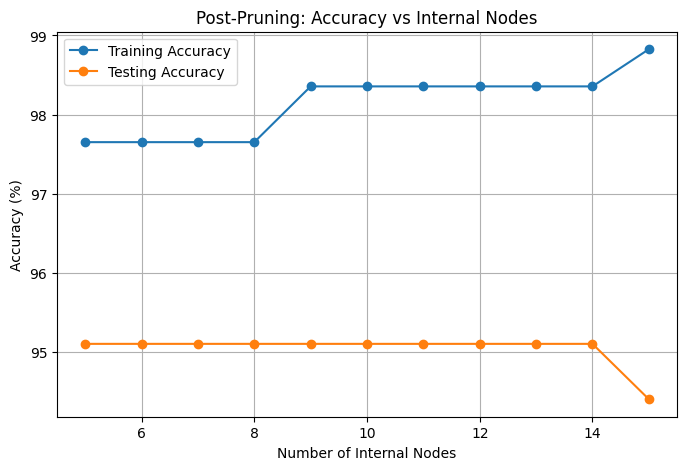


Pruned Tree Structure:
[X27 <= 0.14235]
  [X3 <= 696.25]
    leaf: [{0.0: 6, 1.0: 242}]
    [X1 <= 16.375]
      leaf: [{1.0: 5}]
      leaf: [{0.0: 16, 1.0: 2}]
  [X13 <= 21.924999999999997]
    [X21 <= 29.0]
      leaf: [{0.0: 1, 1.0: 8}]
      leaf: [{0.0: 5}]
    leaf: [{0.0: 140, 1.0: 1}]


In [22]:
# ----------------------------
# 1. Apply post-pruning with tolerance
# ----------------------------
# accuracy_tolerance: allows test accuracy to drop by this amount (in %)
# Examples:
#   0.0 = no drop allowed (strict)
#   0.5 = allow up to 0.5% drop
#   1.0 = allow up to 1.0% drop (more aggressive pruning)
#   2.0 = allow up to 2.0% drop (even more aggressive)

TOLERANCE = 1.0  # Adjust this value to control pruning aggressiveness

pruned_tree, train_acc, test_acc, internal_nodes = post_prune_copy(
    tree_gini, X_train, X_test, 
    stop_on_accuracy_drop=True,
    accuracy_tolerance=TOLERANCE)

# ----------------------------
# 2. Print results
# ----------------------------
print("\n" + "="*60)
print("PRUNING RESULTS")
print("="*60)
print(f"\nConfiguration:")
print(f"  Accuracy tolerance: {TOLERANCE}%")
print(f"\nTree Size:")
print(f"  Original internal nodes: {internal_nodes[0]}")
print(f"  Pruned internal nodes: {internal_nodes[-1]}")
print(f"  Reduction: {internal_nodes[0] - internal_nodes[-1]} nodes "
      f"({(1 - internal_nodes[-1]/internal_nodes[0])*100:.1f}%)")
print(f"\nAccuracy:")
print(f"  Original test accuracy: {test_acc[0]:.2f}%")
print(f"  Final test accuracy: {test_acc[-1]:.2f}%")
print(f"  Change: {test_acc[-1] - test_acc[0]:+.2f}%")
print(f"\nPruning steps:")
for i, (nodes, tr_acc, te_acc) in enumerate(zip(internal_nodes, train_acc, test_acc)):
    print(f"  Step {i}: {nodes:3d} nodes | Train: {tr_acc:6.2f}% | Test: {te_acc:6.2f}%")

# ----------------------------
# 3. Plot pruning results
# ----------------------------
print("\n" + "="*60)
plot_pruning(train_acc, test_acc, internal_nodes)

# ----------------------------
# 4. Print the pruned tree
# ----------------------------
print("\nPruned Tree Structure:")
print("="*60)
print_tree(pruned_tree)

In [ ]:
# ----------------------------
# Compare different tolerance levels
# ----------------------------
print("\n" + "="*70)
print("COMPARING DIFFERENT PRUNING TOLERANCES")
print("="*70)

tolerances = [0.0, 0.5, 1.0, 2.0]
results = []

for tol in tolerances:
    _, _, test_acc_list, nodes_list = post_prune_copy(
        tree_gini, X_train, X_test,
        stop_on_accuracy_drop=True,
        accuracy_tolerance=tol)
    
    results.append({
        'tolerance': tol,
        'final_nodes': nodes_list[-1],
        'final_test_acc': test_acc_list[-1],
        'original_test_acc': test_acc_list[0],
        'acc_change': test_acc_list[-1] - test_acc_list[0]
    })

print("\nTolerance | Final Nodes | Test Accuracy | Accuracy Change")
print("-" * 70)
for r in results:
    print(f"  {r['tolerance']:4.1f}%   |     {r['final_nodes']:3d}     |   {r['final_test_acc']:6.2f}%    |    {r['acc_change']:+5.2f}%")

print("\n💡 Recommendation:")
print("  • Use tolerance=0.0 for maximum accuracy (no drop allowed)")
print("  • Use tolerance=0.5-1.0 for balanced accuracy/simplicity")
print("  • Use tolerance=1.0-2.0 for maximum simplicity with good generalization")
print("="*70)


COMPARING DIFFERENT PRUNING TOLERANCES
Stopping pruning: test accuracy would drop by 1.40% (from 95.10% to 93.71%), exceeding tolerance of 0.00%
Stopping pruning: test accuracy would drop by 1.40% (from 95.10% to 93.71%), exceeding tolerance of 0.00%
Stopping pruning: test accuracy would drop by 1.40% (from 95.10% to 93.71%), exceeding tolerance of 0.50%
Stopping pruning: test accuracy would drop by 1.40% (from 95.10% to 93.71%), exceeding tolerance of 0.50%
Stopping pruning: test accuracy would drop by 1.40% (from 95.10% to 93.71%), exceeding tolerance of 1.00%
Stopping pruning: test accuracy would drop by 1.40% (from 95.10% to 93.71%), exceeding tolerance of 1.00%
Stopping pruning: test accuracy would drop by 3.50% (from 93.01% to 89.51%), exceeding tolerance of 2.00%

Tolerance | Final Nodes | Test Accuracy | Accuracy Change
----------------------------------------------------------------------
   0.0%   |       5     |    95.10%    |    +0.70%
   0.5%   |       5     |    95.10%  